Pipeline 0.4528307849048565
Pipeline 0.7506401111834429
Pipeline 0.7195862726567825
Pipeline 0.8657048649997805
Pipeline 0.8444657087879276
Pipeline -3.423743365173533
Pipeline 0.45159027180341826
Pipeline 0.45282721119249536
VotingRegressor 0.6836610914320782


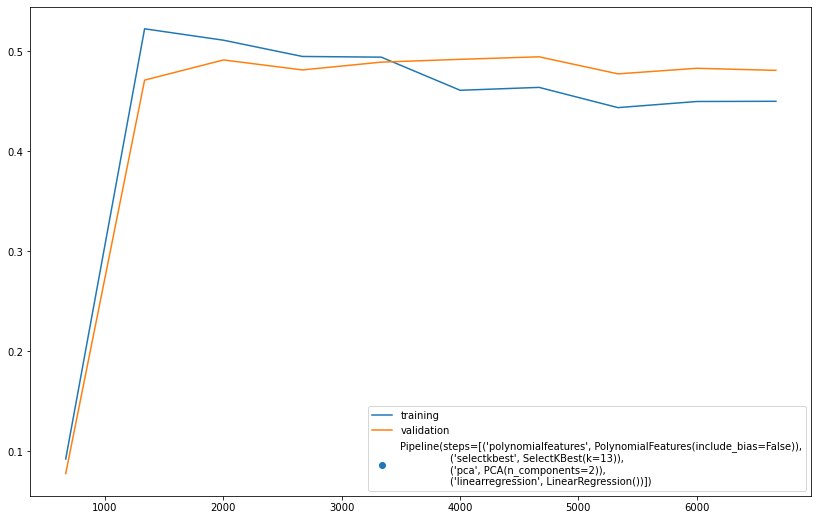

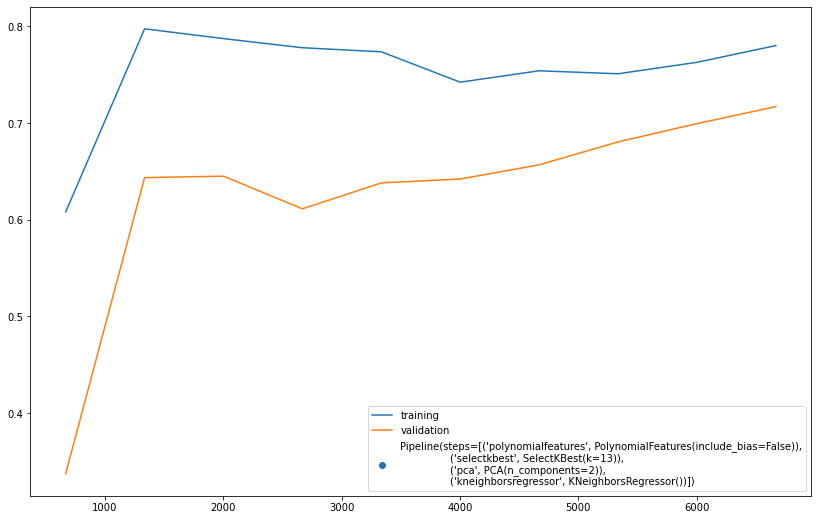

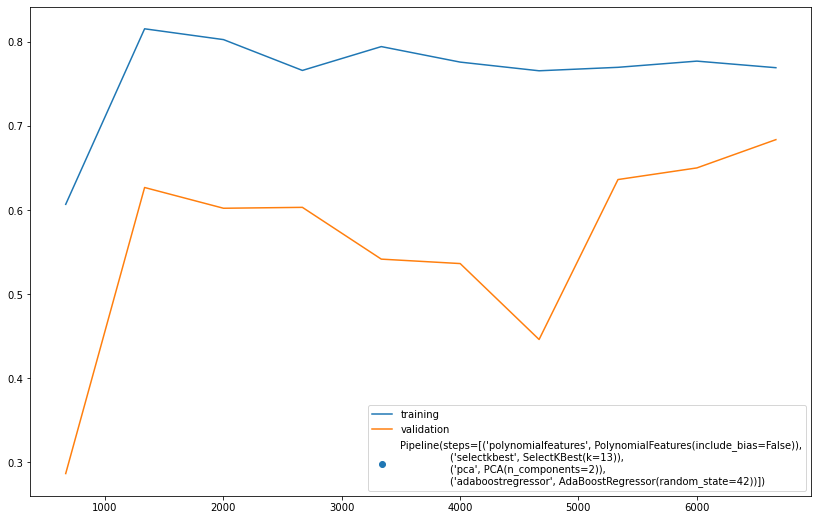

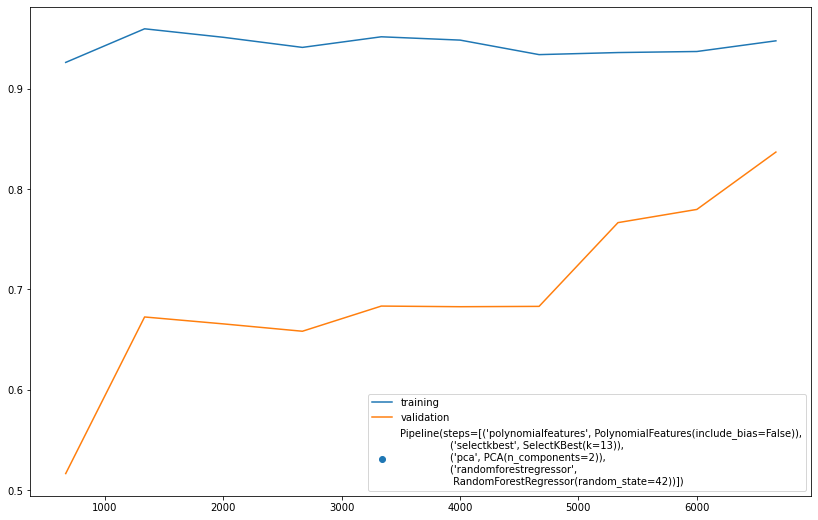

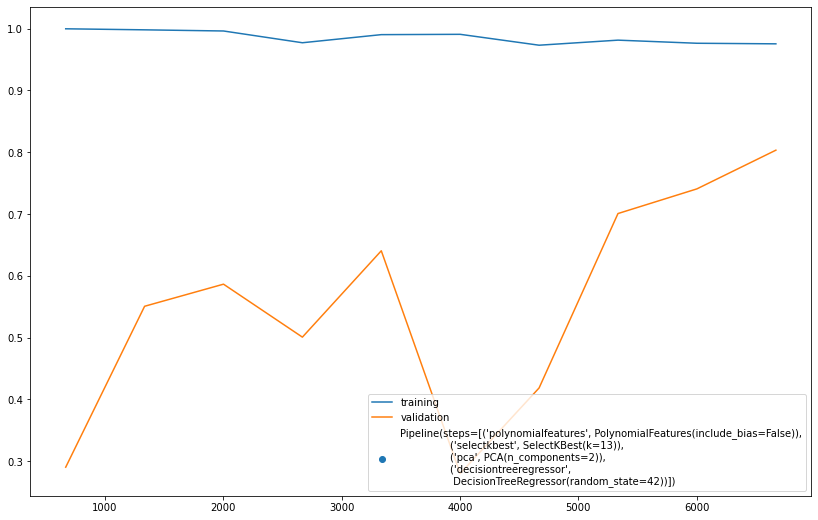

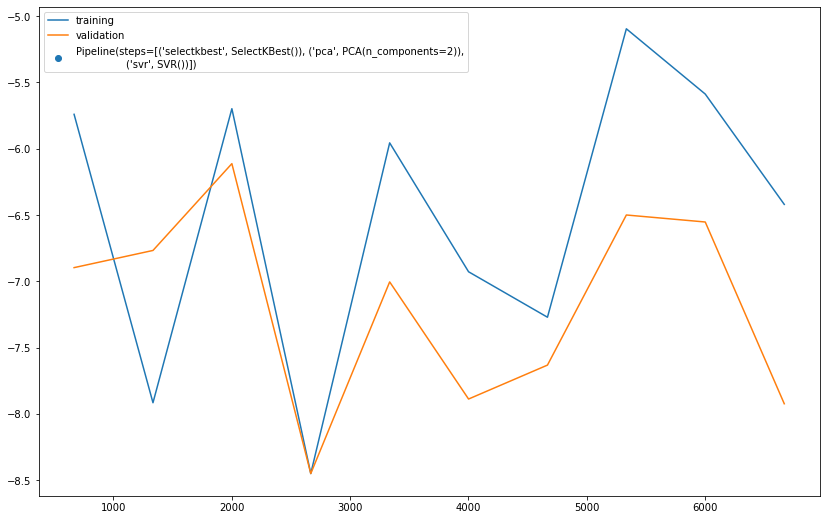

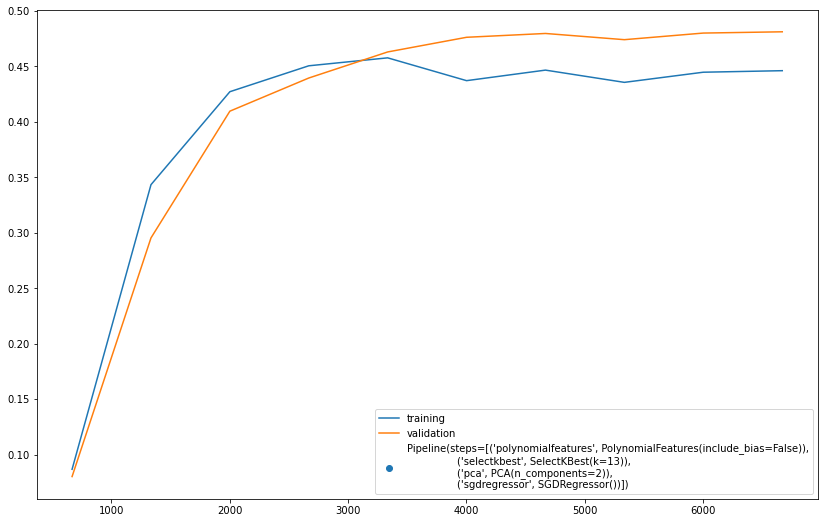

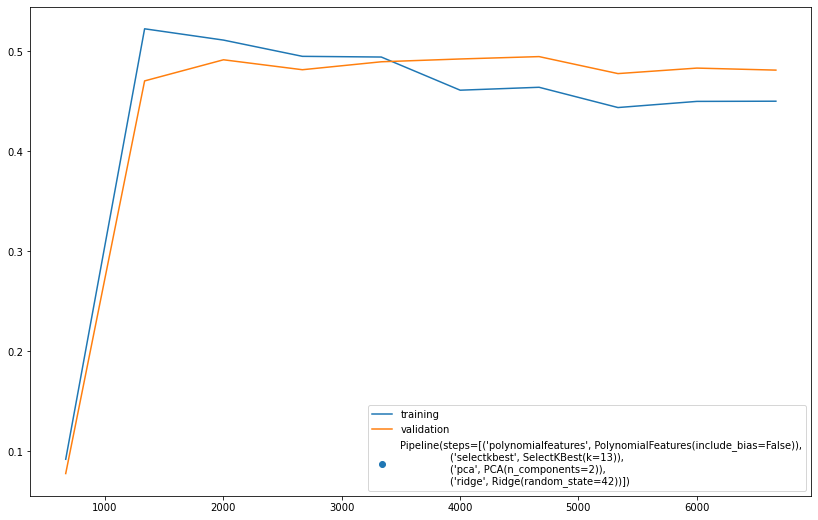

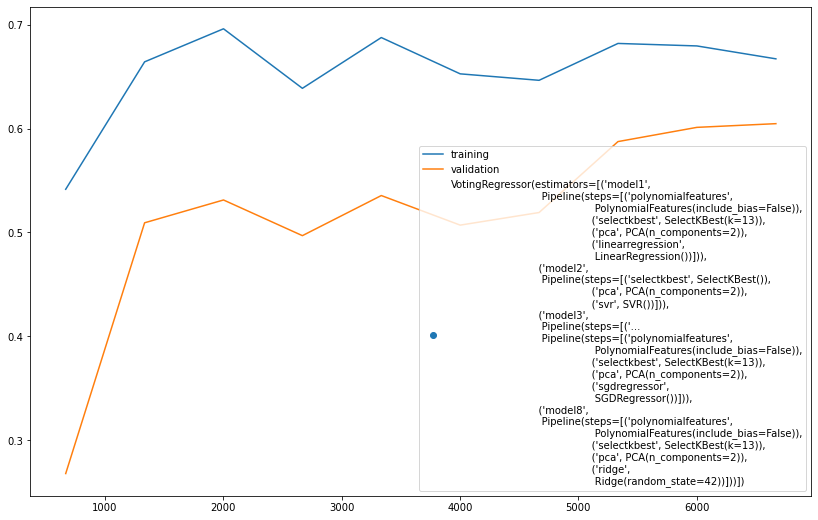

In [80]:
#- Features selection
    #- Best features
#    
#- Features ingenering
    #- Engenring new features 
    #- Polynomial Features  
#- Feature Scaling
    #- MinMaxScaler
    #- StandardScaler
    #- RobustScaler




import pandas as pd
from sklearn.model_selection import train_test_split


donne = pd.read_csv('pratices/data_cars.csv')

data = donne.copy()

data.head()
data.rename(columns={
    'Engine Fuel Type': 'Fuel',
    'Engine HP' : 'Engine',
    'Engine Cylinders' : 'Cylinders',
    'Transmission Type' : 'Transmission',
    'Number of Doors' : 'Doors',
    'Market Category' : 'Category',
    'Vehicle Size' : 'Size',
    'Vehicle Style' : 'Style',
    'highway MPG' : 'MPG',
    'city mpg' : 'City'
    },
    inplace=True)

### dropping unusfull data now
def imputation(data) :
        # if there is problem of data, just decomment these two lines and comment the next one
    #data.drop('Category', axis=1, inplace=True)
    #data.dropna(axis=0, inplace=True)
    data.fillna(0, inplace=True)
    
    return data


## converting string to numbers
def encodage(data):
    for col in data.select_dtypes("object") :
        data[col]= data[col].astype("category").cat.codes
        
    return data


def scaler(data):
    from sklearn.preprocessing import MinMaxScaler
    
    min_max = MinMaxScaler()
    data = pd.DataFrame(min_max.fit_transform(data), columns=data.columns)
    
    return data



def preprocess(data):
    
    data = imputation(data)
    data = encodage(data)
    data = scaler(data)
    
    target = data['MSRP']
    features = data.drop('MSRP', axis=1)

    
    X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=42, test_size=0.3)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = preprocess(data)



### MODELISATION

from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, VotingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.decomposition import PCA

def modelisation(model):
    import matplotlib.pyplot as plt
    from sklearn.model_selection import learning_curve
    import numpy as np
    
    model.fit(X_train, y_train)
    print(model.__class__.__name__, model.score(X_test, y_test))
    
    
    train_size, train_score, val_score = learning_curve(model, X_train, y_train, train_sizes=np.linspace(0.1, 1., 10))

    plt.figure(figsize=(14,9))
    plt.plot(train_size, train_score.mean(axis=1), label='training')
    plt.plot(train_size, val_score.mean(axis=1), label='validation')
    plt.scatter( [], [], label=model)
    plt.legend()

Linear = make_pipeline(PolynomialFeatures(2, include_bias=False), SelectKBest(k=13),PCA(2), LinearRegression())
SVM = make_pipeline( SelectKBest(k=10),PCA(2), SVR())
Neighbors = make_pipeline(PolynomialFeatures(2, include_bias=False), SelectKBest(k=13),PCA(2), KNeighborsRegressor())
Adaboost = make_pipeline(PolynomialFeatures(2, include_bias=False), SelectKBest(k=13),PCA(2), AdaBoostRegressor(random_state=42))
Random = make_pipeline(PolynomialFeatures(2, include_bias=False), SelectKBest(k=13),PCA(2), RandomForestRegressor(random_state=42))
Tree = make_pipeline(PolynomialFeatures(2, include_bias=False), SelectKBest(k=13), PCA(2), DecisionTreeRegressor(random_state=42))
SGD = make_pipeline(PolynomialFeatures(2, include_bias=False), SelectKBest(k=13),PCA(2), SGDRegressor())
Ridge = make_pipeline(PolynomialFeatures(2, include_bias=False), SelectKBest(k=13),PCA(2), Ridge(random_state=42))
Voting = VotingRegressor([
    ('model1', Linear),
    ('model2', SVM),
    ('model3',Neighbors),
    ('model4', Adaboost),
    ('model5', Random),
    ('model6', Tree),
    ('model7', SGD),
    ('model8', Ridge)
])

models = {
   "Linear" : Linear,
   "Neighbors" : Neighbors,
   "Adaboost" : Adaboost, 
   "Random" : Random,
    "Tree" : Tree,
   "Svm" : SVM,
    "SGD" : SGD, 
    "Ridge" : Ridge,
    "Voting" : Voting
}



for model in models.values() :
    modelisation(model)



In [1]:
##reecherche de parametres 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import numpy as np

params = {
    "polynomialfeatures__degree" : np.arange(1,9),
    "selectkbest__k" : np.arange(4,15),
    "ridge__alpha" : np.arange(1,9),
    "ridge__tol" : np.arange(0.001, 0.01),
    "ridge__solver" : ["auto", "svd", "cholesky", "lsqr", "sparse_cg", "sag", "saga"]
    
    }

grille = RandomizedSearchCV(Ridge, params, cv=5, random_state=42)search = grille.fit( X_train, y_train)
print(search.best_score_)
search.best_params_


SyntaxError: invalid syntax (<ipython-input-1-63da5c22f4bc>, line 14)

In [ ]:
X_train.shape

In [ ]:
help(RandomizedSearchCV)